In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Clean the missing values

In [10]:
df = pd.read_csv('price_data(Price).csv')
df['day'] = pd.to_datetime(df['day'])
df = df.drop(['blank', 'HFC', 'FLIR', 'HON', 'SRCL'], axis=1) # Drop a blank colums and stocks missing at least 100 values
# Each stock has at most 2 missing values

"""drops = {}
for col in df.columns:
    df_temp = df[col].dropna()
    drops[col] = len(df_temp)
max_col = min(drops, key=drops.get)
print(f"Column: {max_col}, Non-NaN count: {drops[max_col]}")"""

#Use linear interpolation to fill in missing values
df = df.interpolate(method='linear')

df.dropna(inplace=True) # Drops the first empty row
df.reset_index(drop=True, inplace=True)
print(df.head())

         day    VIX    AAPL    MSFT    AMZN    NVDA   GOOGL    META    TSLA  \
0 2025-05-23  22.29  195.27  450.18  200.99  131.29  168.47  627.06  339.34   
1 2025-05-22  20.28  201.36  454.86  203.10  132.83  170.87  636.57  341.04   
2 2025-05-21  20.87  202.09  452.57  201.12  131.80  168.56  635.50  334.62   
3 2025-05-20  18.09  206.86  458.17  204.07  134.38  163.98  637.10  343.82   
4 2025-05-19  18.14  208.78  458.87  206.16  135.57  166.54  640.43  342.09   

      UNH  ...    IFF   ILMN    INCY  INTC.1  INTU.1     IP    IPG     IR  \
0  295.57  ...  75.00  80.37  64.245   20.05  720.13  47.67  24.00  80.38   
1  296.67  ...  75.72  80.54  64.510   20.55  666.07  48.63  24.06  81.20   
2  302.98  ...  77.07  79.37  64.780   20.69  659.98  48.66  24.28  81.19   
3  321.58  ...  77.88  84.21  65.300   21.27  671.16  50.01  25.21  82.92   
4  315.89  ...  77.34  82.95  63.810   21.38  670.86  50.49  25.46  83.55   

      IRM  ISRG.1  
0   96.21  539.54  
1   95.80  542.67  
2 

## Format the data for the algo

In [11]:
date_data = df['day']
#print(date_data.head())

price_data = df.drop(columns=['day', 'VIX'])
#print(price_data.head())

expected_returns_data = pd.DataFrame(0.08, index = price_data.index, columns = ['expected_return'])['expected_return']
#print(expected_returns_data.head())

window_size = 25
returns = price_data.pct_change()
# Calculate rolling standard deviation (volatility)
# Using min_periods=1 to get values even with limited history
volatility = returns.rolling(window=window_size, min_periods=25).std().shift(1)
# Annualize the volatility by multiplying by sqrt(252) - typical trading days
annualized_volatility = volatility * np.sqrt(252)
#print(annualized_volatility['AAPL'].head(30))

In [ ]:
from simulate_returns import compute_returns

returns_data1 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option1 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)

In [12]:
vol_data = df['VIX'] * 1.5 / 100
#print(vol_data.head())

vol_data2 = pd.DataFrame(0, price_data.index, price_data.columns)
for tick in price_data.columns:
    vol_data2[tick] = vol_data

returns_data2 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option2 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)

In [ ]:
vol_data = df['VIX'] * 2 / 100
#print(vol_data.head())

vol_data3 = pd.DataFrame(0, price_data.index, price_data.columns)
for tick in price_data.columns:
    vol_data2[tick] = vol_data

returns_data3 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option3 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)

In [ ]:
vol_data = df['VIX'] * 1.5 / 100
#print(vol_data.head())

expected_returns_data = pd.DataFrame(0.1, index = price_data.index, columns = ['expected_return'])['expected_return']

vol_data2 = pd.DataFrame(0, price_data.index, price_data.columns)
for tick in price_data.columns:
    vol_data2[tick] = vol_data

returns_data4 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option4 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)



In [ ]:
vol_data = df['VIX'] * 1 / 100
#print(vol_data.head())

expected_returns_data = pd.DataFrame(0.1, index = price_data.index, columns = ['expected_return'])['expected_return']

vol_data2 = pd.DataFrame(0, price_data.index, price_data.columns)
for tick in price_data.columns:
    vol_data2[tick] = vol_data

returns_data5 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=False
)

returns_data_option5 = compute_returns(
    price_data, 
    annualized_volatility,
    expected_returns_data,
    start_day=0,
    lookback=126,
    waiting=20,
    holding=70,
    top_quantile=0.2,
    bottom_quantile=0.2,
    long_only=True,
    with_options=True
)

In [ ]:
# Save the results to CSV files
returns_data1.to_csv('returns_data1.csv')
returns_data_option1.to_csv('returns_data_option1.csv')
returns_data2.to_csv('returns_data2.csv')
returns_data_option2.to_csv('returns_data_option2.csv')
returns_data3.to_csv('returns_data3.csv')
returns_data_option3.to_csv('returns_data_option3.csv')
returns_data4.to_csv('returns_data4.csv')
returns_data_option4.to_csv('returns_data_option4.csv')
returns_data5.to_csv('returns_data5.csv')
returns_data_option5.to_csv('returns_data_option5.csv')


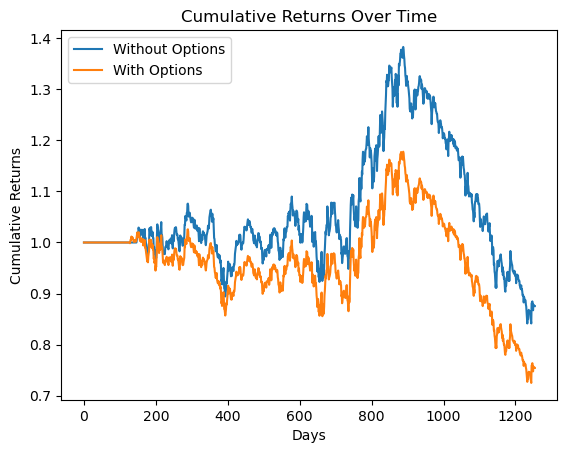

In [17]:
x  = []
y = []
z = []
res = 1
res2 = 1
for i in range(len(returns_data4)):
    x.append(i)
    res = res * (1 + returns_data4[i])
    y.append(res)
    res2 = res2 * (1 + returns_data_option4[i])
    z.append(res2)

plt.plot(x,y, label='Without Options')
plt.plot(x,z, label='With Options')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()

plt.show()